# Ames, Iwoa House Prices Prediction Model
I'm fairly new to data sceince, The main reason I'm in is that I love patterns and insights
This project is using comulative knowledge from differnt predeed from a public Kaggle competition
- First I will manupliate datasets
- Visulaize and Familiarize
- Feature Engineering
- Model Application

A link for columns explanation can be found [here](https://s3.amazonaws.com/dq-content/307/data_description.txt) and why the data was collected [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627)

I've already created a csv combing both train and test datasets for application of feature engineering (so I don't apply it separately to each set)

In [1]:
# librabries to use
import pandas as pd
pd.options.display.max_columns = 400
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings('ignore') # remove usless warning
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test['SalePrice'] = 0
combined = pd.read_csv('AmesHousing.csv') 
combined = combined.loc[:,test.columns] # during CSV creation, columns sorted alphabetacally
print('train file size is'+"   " , train.shape)
print('test file size is'+  "    ", test.shape)
print('combined file size is' , combined.shape)

train file size is    (1460, 81)
test file size is     (1459, 81)
combined file size is (2919, 81)


In [3]:
# exploring Heads and to see if all is OK
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,0
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,0
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,0
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,0


In [5]:
combined.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [6]:
combined.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


Always start with end in mind, Now to explore the sale price (our target feature)

Mean  = $180921.20 
 Sigma = $79415.29


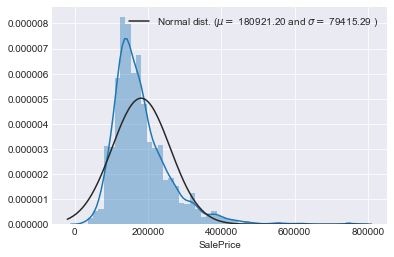

In [7]:
mu, sigma=norm.fit(train.SalePrice)
sns.set_style('darkgrid')
sns.distplot(train['SalePrice'] , fit=norm)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)])
# it's right skewed, can't get much without normalization
print('Mean  = ${:.2f} \n Sigma = ${:.2f}'.format(mu,sigma))

In [8]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
# find storng correlations
cormat = train.corr().SalePrice.sort_values(ascending=False)
cormat.head(12) # observation : GarageArea and GarageCars are very similar in high correlation, will decide what to do with them

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
Name: SalePrice, dtype: float64

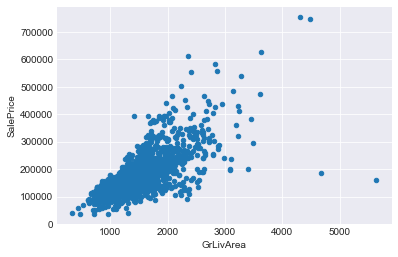

In [10]:
train.plot.scatter('GrLivArea', 'SalePrice') # use pd.plot is much better than direct matplotlib

Notice 4 outliers. What to do with them. Very large green living area while low price may indicate they are faming houses. Also some pricec are above $700,000 , but follwing the trend

In [11]:
train=train[train.GrLivArea<4600] # 2 assumed farm land data points cropped
combined=combined[combined.GrLivArea<4600] 
train.shape

(1458, 81)

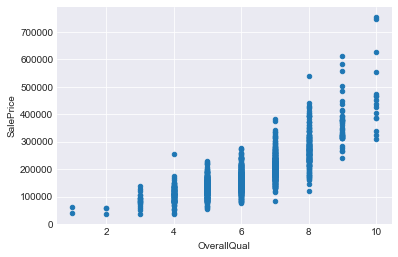

In [12]:
train.plot.scatter('OverallQual','SalePrice') # seems like categrical data

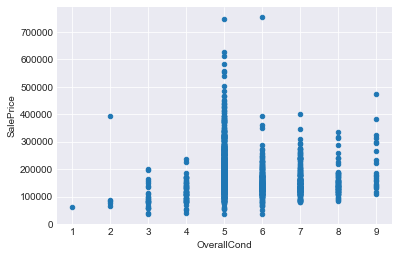

In [13]:
train.plot.scatter('OverallCond','SalePrice') # Invidtigate further later

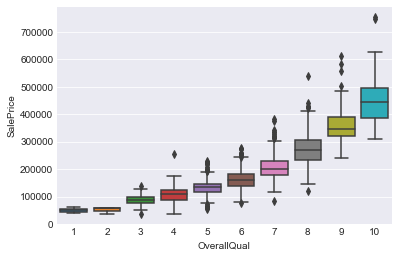

In [14]:
sns.boxplot('OverallQual','SalePrice', data = train) # nicer way to observe 

In [15]:
# Kaggel Scoring (log1p of target)
train['SalePrice'] = np.log1p(train['SalePrice']) # taking ln will return relative SalePrice values, and errors for cheap and expensive will affect results equally

# Feature Engineering Time

In [16]:
# remove features that have no impact on result
combined.drop('Id',inplace=True,axis=1) # Id is a nominal feature (without inplace, you get and empty columns)
# remove leaking data features (we can'y know them except after the sale)
combined.drop(['SaleType','SaleCondition','MoSold'],inplace=True,axis=1) # Year Sold will be removed later after doing some opertaions on it

In [17]:
# Check missing values
mv_perc = combined.isnull().sum()/len(combined)*100
mv_count = combined.isnull().sum()
mv_table = pd.concat([mv_count,mv_perc],axis=1,keys=['Count','Percent'])
mv_table = mv_table[mv_table['Percent']>0].sort_values('Percent',ascending=False)
mv_table

,Count,Percent
PoolQC,2907,99.691358
MiscFeature,2811,96.399177
Alley,2718,93.209877
Fence,2345,80.418381
SalePrice,1458,50.000000
FireplaceQu,1420,48.696845
LotFrontage,486,16.666667
GarageCond,159,5.452675
GarageYrBlt,159,5.452675
GarageFinish,159,5.452675


In [18]:
# dealing with missing vlaues
combined.Alley = combined.Alley.fillna('NA') # if alley don't exists, fill with NA
combined.PoolQC = combined.PoolQC.fillna('NA') # if pool don't exists, fill with NA
combined.MiscFeature = combined.MiscFeature.fillna('NA') # assume no features by default
# notice that Garage Info is missing for the same 159 cells
combined[['GarageQual','GarageCond','GarageFinish','GarageType']] = combined[['GarageQual','GarageCond','GarageFinish','GarageType']].fillna('NA')
combined[['GarageCars','GarageArea','GarageYrBlt']] = combined[['GarageCars','GarageArea','GarageYrBlt']].fillna(0) #Number of garage cars and area, if no garage, no cars, only 1 observation
combined[['BedroomAbvGr','BsmtFullBath','BsmtHalfBath','BsmtUnfSF','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF']] = combined[['BedroomAbvGr','BsmtFullBath','BsmtHalfBath','BsmtUnfSF','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF']].fillna(0)
combined[['BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','BsmtCond']] = combined[['BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','BsmtCond']].fillna('NA')
combined.Fence=combined.Fence.fillna('NA') # NA mean no fence
combined.KitchenQual = combined.KitchenQual.fillna('TA')
combined.Functional = combined.Functional.fillna('Typ')
combined.Electrical = combined.Electrical.fillna(combined.Electrical.mode()[0]) # use the mode, since there is no NA option
combined.Utilities = combined.Utilities.fillna(combined.Utilities.mode()[0])
combined.MasVnrArea = combined.MasVnrArea.fillna(0)
combined.MasVnrType = combined.MasVnrType.fillna('None')
combined.MSZoning = combined.MSZoning.fillna(combined.MSZoning.mode()[0]) # type of sale zone
combined.FireplaceQu = combined.FireplaceQu.fillna('NA')
combined["LotFrontage"] = combined.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median())) # Area of one front in neighborhood is the same for all houses
combined.Exterior1st = combined.Exterior1st.fillna(combined.Exterior1st.mode()[0])
combined.Exterior2nd = combined.Exterior2nd.fillna(combined.Exterior2nd.mode()[0])

In [19]:
mv_perc = combined.isnull().sum()/len(combined)*100 
print('Missing Values count is', mv_perc.max()) # Nothing is missing

Missing Values count is 50.0


Now is the time to deal with numerical and categorical feature

In [20]:
combined.info()
numfeat = train.select_dtypes(include = ['int64','float64']).columns
objfeat = train.select_dtypes(include ='object').columns
years_sold = combined['YrSold'] - combined['YearBuilt'] # we are not intersted in abosulute dates, aonly relative date ( ratio not interval scales)
years_mod = combined['YrSold'] - combined['YearRemodAdd']
combined['YearsSold'] = years_sold
combined['YearsRemod'] = years_sold
combined['YearABS'] = combined['YearBuilt'].apply(lambda x: abs(datetime.datetime.now().year - x))
cpmbined = combined.drop(['YrSold','YearBuilt','YearRemodAdd'], inplace=True, axis=1)
combined[years_sold<0] # a year where the house is modified aftr its sold is @ index 2295
combined.drop([2295],axis=0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 0 to 2918
Data columns (total 77 columns):
MSSubClass       2916 non-null int64
MSZoning         2916 non-null object
LotFrontage      2916 non-null float64
LotArea          2916 non-null int64
Street           2916 non-null object
Alley            2916 non-null object
LotShape         2916 non-null object
LandContour      2916 non-null object
Utilities        2916 non-null object
LotConfig        2916 non-null object
LandSlope        2916 non-null object
Neighborhood     2916 non-null object
Condition1       2916 non-null object
Condition2       2916 non-null object
BldgType         2916 non-null object
HouseStyle       2916 non-null object
OverallQual      2916 non-null int64
OverallCond      2916 non-null int64
YearBuilt        2916 non-null int64
YearRemodAdd     2916 non-null int64
RoofStyle        2916 non-null object
RoofMatl         2916 non-null object
Exterior1st      2916 non-null object
Exterior2nd      2916 no

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SalePrice,YearsSold,YearsRemod,YearABS
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,208500.0,5,5,16
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,181500.0,31,31,43
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,223500.0,7,7,18
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,140000.0,91,91,104
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,250000.0,8,8,19
5,50,RL,85.0,14115,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,NA,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,NA,MnPrv,Shed,700,143000.0,16,16,26
6,20,RL,75.0,10084,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0,GasA,Ex,Y,SBrkr,1694,0,0,1694,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2.0,636.0,TA,TA,Y,255,57,0,0,0,0,NA,NA,NA,0,307000.0,3,3,15
7,60,RL,80.0,10382,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,NA,NA,Shed,350,200000.0,36,36,46
8,50,RM,51.0,6120,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Gd,Y,FuseF,1022,752,0,1774,0.0,0.0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2.0,468.0,Fa,TA,Y,90,0,205,0,0,0,NA,NA,NA,0,129900.0,77,77,88
9,190,RL,50.0,7420,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851.0,Unf,0.0,140.0,991.0,GasA,Ex,Y,SBrkr,1077,0,0,1077,1.0,0.0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1.0,205.0,Gd,TA,Y,0,4,0,0,0,0

Time to deal with numerical features, low variablilty, skewness, collineairty and disguised as numerical 

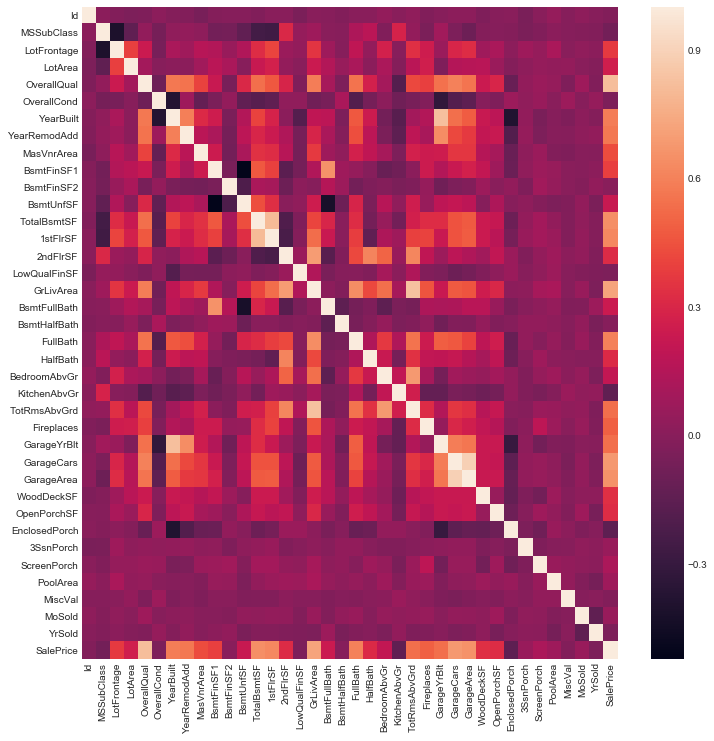

In [21]:
fig=plt.figure(figsize=(12,12))
sns.heatmap(train[numfeat].corr())

In [22]:
# Garage cars and Garage Area have the same correlation accross most fields, the one with lower correlation to sale will be removed
combined = combined.drop('GarageArea', axis=1) # Collinearity, removing this improved rmse

In [23]:
# disguised
combined['MSSubClass'] = combined['MSSubClass'].apply(str)
combined['OverallCond'] = combined['OverallCond'].astype(str)
combined.shape

(2916, 76)

In [24]:
# low variability selector (temporary)

In [25]:
# Since we know that total area of a house is really import 
combined['TotalIntrSF'] = combined['1stFlrSF'] + combined['2ndFlrSF']+combined['TotalBsmtSF']
combined["AllSF"] = combined["GrLivArea"] + combined["TotalIntrSF"]
combined["AllPorchSF"] = combined["OpenPorchSF"] + combined["EnclosedPorch"] + combined["3SsnPorch"] + combined["ScreenPorch"]

We always want our data to have more normality which help with regression  we need to reduce outliers and skewness, we can use probaility plot to check the data

In [26]:
# Skewdness
numfeat = combined.dtypes[combined.dtypes != "object"].index
skewed = combined[numfeat].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = abs(skewed)>0.75
from scipy.special import boxcox1p
skewedfeat = skewness.index
lam = 0.0
for feat in skewedfeat:
    combined[feat] = boxcox1p(combined[feat], lam) # or choose lam=0
    # combined[feat] = combined[feat].apply(lambda x: np.log1p(x),1) # taking the log(x+1) resulted in mych better rmse than boxcox1p
skewed.head() # before

MiscVal         22.179467
PoolArea        17.685603
LotArea         13.187716
LowQualFinSF    12.082427
3SsnPorch       11.370087
dtype: float64

In [27]:
combined.shape

(2916, 79)

In [28]:
# After BoxCox
skewed = combined[numfeat].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewed.head()

PoolArea        15.620564
3SsnPorch        8.820546
LowQualFinSF     8.553113
MiscVal          5.221513
BsmtHalfBath     3.785794
dtype: float64

In [29]:
combined.shape

(2916, 79)

In [30]:
# Transform categroical features with label_encoder (question: do we need to perofrom box cox before or after encoding?)
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond')

transformed_cat_cols = []
for col in cols:
    if col in combined.columns:
        transformed_cat_cols.append(col)

value_count_dict = {}
for col in transformed_cat_cols:
    value = combined[col].value_counts().shape[0]
    value_count_dict[col] = value

#  remove features with so many categories
nr_category = 12  # Experiment at differnt cutoffs
uniqueness_counts = combined[transformed_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > nr_category].index
combined = combined.drop(drop_nonuniq_cols, axis=1)

In [31]:
# get_dummies
text_cols = combined.select_dtypes(include=['object'])
for col in text_cols:
    combined[col] = combined[col].astype('category')
combined = pd.concat([combined,pd.get_dummies(combined.select_dtypes(include='category'))],axis=1)
combined = combined.drop(combined.columns[(combined.dtypes=='category')],axis=1) # drop categories after conversion to dummies
print(value_count_dict)
print(combined.shape)

{'FireplaceQu': 6, 'BsmtQual': 5, 'BsmtCond': 5, 'GarageQual': 6, 'GarageCond': 6, 'ExterQual': 4, 'ExterCond': 5, 'HeatingQC': 5, 'PoolQC': 4, 'KitchenQual': 4, 'BsmtFinType1': 7, 'BsmtFinType2': 7, 'Functional': 7, 'Fence': 5, 'BsmtExposure': 5, 'GarageFinish': 4, 'LandSlope': 3, 'LotShape': 4, 'PavedDrive': 3, 'Street': 2, 'Alley': 3, 'CentralAir': 2, 'MSSubClass': 16, 'OverallCond': 9}
(2916, 295)


In [32]:
# Turn top 10 most correlated into polynomial

In [33]:
# split into train and test data 
ntrain = 1458
train = combined[:ntrain]
test = combined[ntrain:].drop('SalePrice',axis=1)
features = test.columns

### Models

In [34]:
lr = LinearRegression()

In [35]:
# Validation function
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train[features], train['SalePrice'], scoring = "neg_mean_squared_error", cv = kf))
    return(rmse)
rmsle_cv(lr).mean()

0.12706323505773412

In [36]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [37]:
score = rmsle_cv(lasso)
print('mean: {}'.format(score.mean()), '\n std: {}'.format(score.std()))

mean: 0.11094304967526614 
 std: 0.013694675808689251


## Submission File Generated
I will use lasso model for predictions

In [38]:
lasso.fit(train[features],train['SalePrice'])
prediction = np.expm1(lasso.predict(test[features])) #invert price back to actual dollars
prediction[:10]

array([116369.00369817, 158627.6719771 , 185014.7172793 , 200058.7488313 ,
       191306.73890594, 169961.86419186, 177634.06011686, 159378.46661285,
       198920.24546207, 117347.59872343])

In [41]:
pd.concat((train,test))

,1stFlrSF,2ndFlrSF,3SsnPorch,AllPorchSF,AllSF,Alley_Grvl,Alley_NA,Alley_Pave,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinSF1,BsmtFinSF2,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFullBath,BsmtHalfBath,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtUnfSF,CentralAir_N,CentralAir_Y,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,EnclosedPorch,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,Fireplaces,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,FullBath,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageCars,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageYrBlt,GrLivArea,HalfBath,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenAbvGr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LotArea,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotFrontage,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LowQualFinSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrArea,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MiscFeature_Gar2,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscVal,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,OpenPorchSF,OverallCond_1,OverallCond_2,OverallCon